# Import needed libraries

In [32]:
import sys
import os
import pandas as pd
import numpy as np
import random

random.seed(123)

In [33]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


# Import python modules

In [34]:
# Get the absolute path of the folders that contain the modules
[sys.path.append(os.path.abspath(os.path.join(os.getcwd(), path))) for path in ["../src/data/", "../src/features/models/"]]

# Import notebooks
import download_datasets
import dataset_controls
import random_data_generator
import logistic_model

# Download files from cloud

In [35]:
# File IDs dictionary
file_ids = {
    "dim_people": "1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR",
    "fact_games_played": "1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN", 
}

# Get the path two levels up from the current working directory
base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# Loop through all files in the dictionary and download them
for file_name, file_id in file_ids.items():
    print(f"Downloading {file_name}...")
    
    # Construct the full URL to download the file using the file ID
    url = f"https://drive.google.com/uc?id={file_id}"
    
    # Call the function to download the file with the constructed URL
    download_datasets.download_file_from_cloud(url, base_path)

    print(f"{file_name} saved successfully!\n")

Downloading...
From: https://drive.google.com/uc?id=1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR
To: c:\Users\carme\Documents\SeniorTrAIning\main_data\notebooks\dim_people.csv
100%|██████████| 191k/191k [00:00<00:00, 2.52MB/s]


File saved at: c:\Users\carme\Documents\dim_people.csv
File successfully loaded. First rows:
dim_people saved successfully!



Downloading...
From: https://drive.google.com/uc?id=1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN
To: c:\Users\carme\Documents\SeniorTrAIning\main_data\notebooks\fact_games_played.csv
100%|██████████| 54.0/54.0 [00:00<?, ?B/s]

File saved at: c:\Users\carme\Documents\fact_games_played.csv
File successfully loaded. First rows:
fact_games_played saved successfully!



# Load the dataframes

In [36]:
dict_dfs = download_datasets.opening_dataframes(file_ids, base_path)

Loading dim_people.csv...
Loading fact_games_played.csv...


# Generate random data

## DIM_people

In [37]:
random_data_generator.change_id_to_autoincrement(dict_dfs['dim_people'])

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,9/27/1955,77,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,2/26/1959,88,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,6/22/1956,82,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,11/6/1951,100,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,11/24/1952,65,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,12/7/1957,99,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,11/23/1953,34,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,3/27/1952,43,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,6/7/1952,30,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [38]:
dataset_controls.calculate_age(dict_dfs['dim_people'], 'date_birth')

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,66,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [39]:
dict_dfs['dim_people']['country'] = 'Spain'

In [40]:
# Apply the estimation of languages spoken 
dict_dfs['dim_people']['languages_spoken'] = dict_dfs['dim_people'].apply(lambda row: random_data_generator.estimate_languages_spoken(row['age'], row['education_level']), axis=1)

In [41]:
dict_dfs['dim_people']

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Spain,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,2,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,66,Rupiah,Bogorejo,Spain,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,1,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Spain,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,3+,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Spain,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,2,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Spain,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,1,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Spain,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,1,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Spain,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,1,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Spain,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,2,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,Spain,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,1,152,76,Arthritis,Aspirin,Yoga


In [42]:
final_model_dataframe = dict_dfs['dim_people'][['email', 'age', 'education_level', 'languages_spoken', 'gender']]

## FACT_games_played

In [43]:
fact_games_played = pd.DataFrame({'success': np.random.uniform(0, 1, size=10000)})

In [44]:
values = np.floor(fact_games_played['success'] * 100)/ 100

In [45]:
fact_games_played['success_proportion'] = values

In [46]:
fact_games_played['average_time'] = np.random.uniform(0, 3, size=10000)

In [47]:
fact_games_played

,success,success_proportion,average_time
0,0.192043,0.19,0.417276
1,0.497141,0.49,1.118131
2,0.372155,0.37,2.526858
3,0.309142,0.30,2.961300
4,0.466414,0.46,1.868766
...,...,...,...
9995,0.934138,0.93,2.260597
9996,0.958942,0.95,2.499782
9997,0.213796,0.21,0.648114
9998,0.640972,0.64,2.275225


In [48]:
# Add user information to fact games

# Add email as key id
random.seed(123)
emails_list = random.choices(dict_dfs['dim_people']["email"], k=10000)
fact_games_played["email"] = [str(emails_list[i]) for i in range(0, len(emails_list))]
fact_games_played


,success,success_proportion,average_time,email
0,0.192043,0.19,0.417276,llewcock1g@opera.com
1,0.497141,0.49,1.118131,khenric2f@mozilla.org
2,0.372155,0.37,2.526858,aruggsbb@scientificamerican.com
3,0.309142,0.30,2.961300,bmcgowan2z@mozilla.org
4,0.466414,0.46,1.868766,lgraalmansp1@about.me
...,...,...,...,...
9995,0.934138,0.93,2.260597,jyuj4@independent.co.uk
9996,0.958942,0.95,2.499782,dhoferl5@mtv.com
9997,0.213796,0.21,0.648114,lgherardellilj@bizjournals.com
9998,0.640972,0.64,2.275225,rdimmick3v@cyberchimps.com


# Joining dataframes

In [49]:
merged_dataframe = pd.merge(final_model_dataframe, fact_games_played, on='email', how='inner')
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time
0,tmathy0@mapquest.com,69,University,2,Male,0.663911,0.66,0.349019
1,tmathy0@mapquest.com,69,University,2,Male,0.757344,0.75,2.271860
2,tmathy0@mapquest.com,69,University,2,Male,0.065080,0.06,2.580395
3,tmathy0@mapquest.com,69,University,2,Male,0.814597,0.81,2.085828
4,tmathy0@mapquest.com,69,University,2,Male,0.313187,0.31,0.802498
...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,3+,Male,0.211667,0.21,0.540553
9996,bpischoffrr@myspace.com,67,University,3+,Male,0.940314,0.94,0.411499
9997,bpischoffrr@myspace.com,67,University,3+,Male,0.770171,0.77,0.041234
9998,bpischoffrr@myspace.com,67,University,3+,Male,0.808256,0.80,1.946155


In [50]:
# final_model_dataframe['email'] = final_model_dataframe['email'].astype(str)
# fact_games_played['email'] = fact_games_played['email'].astype(str)

# final_model_dataframe_facts = pd.merge(final_model_dataframe, fact_games_played, on="email", how="right")

In [51]:
# # No sé por qué me da error acá
# #final_model_dataframe_facts = final_model_dataframe.join(fact_games_played, on=["email"], how="right")
# #final_model_dataframe_facts

# # Por ahora uso el que tiene 1000 obs
# final_model_dataframe_facts = final_model_dataframe

In [52]:
# Make average reaction time and accuracy in game a function of age and education 
merged_dataframe["average_time"] = merged_dataframe.apply(lambda row: random_data_generator.generate_reaction_time(row['age'], row['education_level']), axis=1)
merged_dataframe["accuracy"] = merged_dataframe.apply(lambda row: random_data_generator.generate_accuracy(row['age'], row['education_level']), axis=1)
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time,accuracy
0,tmathy0@mapquest.com,69,University,2,Male,0.663911,0.66,5.846229,0.475448
1,tmathy0@mapquest.com,69,University,2,Male,0.757344,0.75,5.902490,0.682511
2,tmathy0@mapquest.com,69,University,2,Male,0.065080,0.06,4.221146,0.120860
3,tmathy0@mapquest.com,69,University,2,Male,0.814597,0.81,4.869577,0.455472
4,tmathy0@mapquest.com,69,University,2,Male,0.313187,0.31,5.643311,0.356436
...,...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,3+,Male,0.211667,0.21,4.533741,0.143844
9996,bpischoffrr@myspace.com,67,University,3+,Male,0.940314,0.94,5.129342,0.780809
9997,bpischoffrr@myspace.com,67,University,3+,Male,0.770171,0.77,7.361624,0.993935
9998,bpischoffrr@myspace.com,67,University,3+,Male,0.808256,0.80,3.062603,0.055987


In [53]:
merged_dataframe.describe()

,age,success,success_proportion,average_time,accuracy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.120000,0.496368,0.491383,6.134749,0.380698
std,3.214535,0.288570,0.288566,1.190523,0.259743
min,64.000000,0.000135,0.000000,2.249948,0.050105
25%,66.000000,0.243863,0.240000,5.312130,0.171136
50%,69.000000,0.494792,0.490000,6.141178,0.288744
75%,72.000000,0.745249,0.740000,6.961347,0.558903
max,75.000000,0.999989,0.990000,9.896420,0.999952


In [54]:
merged_dataframe["average_time"].quantile(0.75)

6.961346987156212

In [55]:
# Generate cognitive level value
time_reference = merged_dataframe["average_time"].quantile(0.75)
acc_reference = 0.5
merged_dataframe["cog_level"] = merged_dataframe.apply(lambda row: random_data_generator.generate_cog_state(row["average_time"], row["accuracy"], time_reference, acc_reference ), axis=1)

In [56]:
# Check
merged_dataframe.describe()

,age,success,success_proportion,average_time,accuracy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.120000,0.496368,0.491383,6.134749,0.380698
std,3.214535,0.288570,0.288566,1.190523,0.259743
min,64.000000,0.000135,0.000000,2.249948,0.050105
25%,66.000000,0.243863,0.240000,5.312130,0.171136
50%,69.000000,0.494792,0.490000,6.141178,0.288744
75%,72.000000,0.745249,0.740000,6.961347,0.558903
max,75.000000,0.999989,0.990000,9.896420,0.999952


# Train model for the first game

c:\Users\carme\Documents\SeniorTrAIning\main_data\src\features\models\logistic_model.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].replace({
c:\Users\carme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\carme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\carme\anaconda3\lib\site-packages\s

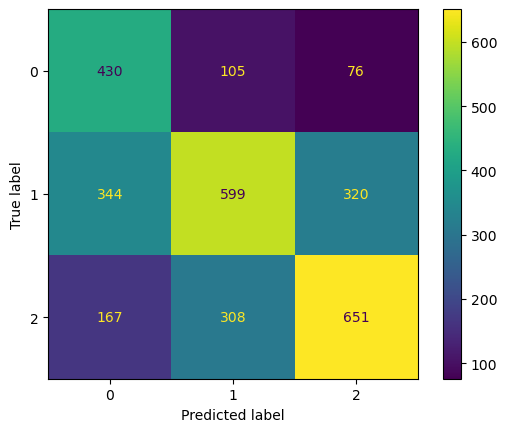

Accuracy: 0.56
Recall: 0.56
F1 Score: 0.5594414468046822


In [57]:
logistic_model = logistic_model.logistic_regression_game01(merged_dataframe, 'precision', 0)

In [58]:
# Obtain the coefficients of the best model
feature_importance = pd.DataFrame({
    "Feature": logistic_model.feature_names_in_,  # Variable names
    "Coefficient": logistic_model.coef_[2]  # Model coefficients
})

# Ordenar por importancia absoluta
feature_importance["Exp_Coefficient"] = np.exp(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Exp_Coefficient", ascending=False)


In [59]:
print(feature_importance)

                          Feature  Coefficient  Exp_Coefficient
2                        accuracy     0.226031         1.253614
6                    gender_Other     0.061448         1.063375
7              languages_spoken_2    -0.006140         0.993879
0                             age    -0.007023         0.993002
4      education_level_University    -0.038066         0.962649
8             languages_spoken_3+    -0.040627         0.960187
5                     gender_Male    -0.060653         0.941149
3  education_level_Primary School    -0.142450         0.867231
1                    average_time    -0.332742         0.716955


In [ ]:
print(sklearn.__version__)

1.5.1


In [64]:
import joblib

model = joblib.load(r"C:\Users\carme\Documents\SeniorTrAIning\models\modelo.pkl")
print(type(model))  # Verifica el tipo de modelo


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [68]:
from sklearn.linear_model import LogisticRegression
import joblib

# Guardar correctamente
joblib.dump(model, r"C:\Users\carme\Documents\SeniorTrAIning\models\modelo2.pkl")


['C:\\Users\\carme\\Documents\\SeniorTrAIning\\models\\modelo2.pkl']